### Load libraries

In [1]:

import numpy as np
import networkx as nx
from dingo import MetabolicNetwork
import matplotlib.pyplot as plt
import pandas as pd

import sys
sys.path.insert(0, '../scripts/')
from load_modify_sample_utils import load_model, get_objective_functions, get_reaction_bounds, modify_model, sample_gapsplit, plot_grid_95_reactions
from load_modify_sample_utils import sample_dingo, sample_optgp, sampling_statistics
from graphs_utils import construct_graph, plot_graph
from distributions_comparison_utils import significantly_altered_reactions
from loopless_utils import get_loopless_solutions_from_samples, calculate_affected_samples, set_bounds_from_loopless_solution_samples
from loopless_utils import calculate_distances_from_samples, calculate_distances_from_reactions, violin_plot_samples_distances


/home/touliopoulos/.local/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/touliopoulos/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


### Load initial model and extract information

In [2]:
ec_cobra_model, ec_cobra_reactions, ec_dingo_model, ec_dingo_reactions = load_model("../ext_data/models/e_coli_core.xml")

objective_functions = get_objective_functions(ec_cobra_model)
print(objective_functions)

default_reaction_bounds = get_reaction_bounds(ec_cobra_model)
print(default_reaction_bounds)


Set parameter Username
Set parameter LicenseID to value 2642044
Academic license - for non-commercial use only - expires 2026-03-25
['BIOMASS_Ecoli_core_w_GAM']
{'PFK': (0.0, 1000.0), 'PFL': (0.0, 1000.0), 'PGI': (-1000.0, 1000.0), 'PGK': (-1000.0, 1000.0), 'PGL': (0.0, 1000.0), 'ACALD': (-1000.0, 1000.0), 'AKGt2r': (-1000.0, 1000.0), 'PGM': (-1000.0, 1000.0), 'PIt2r': (-1000.0, 1000.0), 'ALCD2x': (-1000.0, 1000.0), 'ACALDt': (-1000.0, 1000.0), 'ACKr': (-1000.0, 1000.0), 'PPC': (0.0, 1000.0), 'ACONTa': (-1000.0, 1000.0), 'ACONTb': (-1000.0, 1000.0), 'ATPM': (8.39, 1000.0), 'PPCK': (0.0, 1000.0), 'ACt2r': (-1000.0, 1000.0), 'PPS': (0.0, 1000.0), 'ADK1': (-1000.0, 1000.0), 'AKGDH': (0.0, 1000.0), 'ATPS4r': (-1000.0, 1000.0), 'PTAr': (-1000.0, 1000.0), 'PYK': (0.0, 1000.0), 'BIOMASS_Ecoli_core_w_GAM': (0.0, 1000.0), 'PYRt2': (-1000.0, 1000.0), 'CO2t': (-1000.0, 1000.0), 'RPE': (-1000.0, 1000.0), 'CS': (0.0, 1000.0), 'RPI': (-1000.0, 1000.0), 'SUCCt2_2': (0.0, 1000.0), 'CYTBD': (0.0, 1000.

### Generate samples

In [3]:

ec_cobra_model_biomass_obj_0_opt, ec_dingo_model_biomass_obj_0_opt = modify_model(ec_cobra_model, objective_function="BIOMASS_Ecoli_core_w_GAM", optimal_percentage=0)
ec_cobra_model_biomass_obj_50_opt, ec_dingo_model_biomass_obj_50_opt = modify_model(ec_cobra_model, objective_function="BIOMASS_Ecoli_core_w_GAM", optimal_percentage=50)


samples_dingo_condition_1 = sample_dingo(ec_dingo_model_biomass_obj_0_opt, reaction_in_rows = True, ess=2000)
print(samples_dingo_condition_1.shape)

samples_dingo_condition_2 = sample_dingo(ec_dingo_model_biomass_obj_50_opt, reaction_in_rows = True, ess=2000)
print(samples_dingo_condition_2.shape)


samples_optgp_condition_1 = sample_optgp(ec_cobra_model_biomass_obj_50_opt, n_samples = 3000, thinning = 1, reaction_in_rows = True)
samples_optgp_condition_2 = sample_optgp(ec_cobra_model_biomass_obj_50_opt, n_samples = 3000, thinning = 100, reaction_in_rows = True)



Read LP format model from file /tmp/tmpcbaq_45_.lp


Reading time = 0.00 seconds
: 72 rows, 190 columns, 720 nonzeros
Read LP format model from file /tmp/tmpdy5n3e9l.lp
Reading time = 0.01 seconds
: 72 rows, 190 columns, 720 nonzeros
Set parameter Username
Set parameter LicenseID to value 2642044
Academic license - for non-commercial use only - expires 2026-03-25
phase 1: number of correlated samples = 500, effective sample size = 11, ratio of the maximum singilar value over the minimum singular value = 1112.92
phase 2: number of correlated samples = 500, effective sample size = 124, ratio of the maximum singilar value over the minimum singular value = 2.02785
phase 3: number of correlated samples = 2400, effective sample size = 943
phase 4: number of correlated samples = 2400, effective sample size = 1010
[5]total ess 2088: number of correlated samples = 5800


(95, 5800)


[5]maximum marginal PSRF: 1.00241


phase 1: number of correlated samples = 500, effective sample size = 14, ratio of the maximum singilar value over the minimum singular value = 1748.83
phase 2: number of correlated samples = 500, effective sample size = 142, ratio of the maximum singilar value over the minimum singular value = 2.04667
phase 3: number of correlated samples = 2400, effective sample size = 850
phase 4: number of correlated samples = 2400, effective sample size = 686
phase 5: number of correlated samples = 1000, effective sample size = 368
[5]total ess 2060: number of correlated samples = 6800


(95, 6800)
Read LP format model from file /tmp/tmp03todzj7.lp
Reading time = 0.00 seconds
: 72 rows, 190 columns, 720 nonzeros


[5]maximum marginal PSRF: 1.00283


Read LP format model from file /tmp/tmpupgladxy.lp
Reading time = 0.00 seconds
: 72 rows, 190 columns, 720 nonzeros


### Define samples to procceed

In [4]:
samples_optgp_ec_model = samples_optgp_condition_1
ec_cobra_model = ec_cobra_model_biomass_obj_50_opt

samples_dingo_ec_model = samples_dingo_condition_1
ec_dingo_model = ec_dingo_model_biomass_obj_0_opt

### Calculate the loopless solution and save to numpy 2D array

In [5]:

samples_dingo_ec_model_loopless_solutions = get_loopless_solutions_from_samples(samples_dingo_ec_model, ec_cobra_model)

print(samples_dingo_ec_model.shape)
print(samples_dingo_ec_model_loopless_solutions.shape)


samples_optgp_ec_model_loopless_solutions = get_loopless_solutions_from_samples(samples_optgp_ec_model, ec_cobra_model)

print(samples_optgp_ec_model.shape)
print(samples_optgp_ec_model_loopless_solutions.shape)


/home/touliopoulos/.local/lib/python3.10/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


(95, 5800)
(95, 5800)
(95, 3000)
(95, 3000)


### Get the flux ranges from loopless solutions sampling and apply them as minimum and maximum reaction bounds

In [6]:

constrained_ec_cobra_model = set_bounds_from_loopless_solution_samples(samples_dingo_ec_model_loopless_solutions, ec_cobra_model)

# sample again with bounds constrained from loopless solutions
constrained_ec_dingo_model = MetabolicNetwork.from_cobra_model(constrained_ec_cobra_model)
samples_dingo_ec_model_constrained = sample_dingo(constrained_ec_dingo_model, reaction_in_rows = True, ess=2000)
print(samples_dingo_ec_model_constrained.shape)


#samples_optgp_ec_model_constrained = sample_optgp(constrained_ec_cobra_model, n_samples = samples_dingo_ec_model_constrained.shape[1], reaction_in_rows = True)
samples_optgp_ec_model_constrained = sample_optgp(constrained_ec_cobra_model, n_samples = 2000, reaction_in_rows = True)
print(samples_optgp_ec_model_constrained.shape)


Read LP format model from file /tmp/tmpa1imyi49.lp
Reading time = 0.00 seconds
: 72 rows, 190 columns, 720 nonzeros


phase 1: number of correlated samples = 400, effective sample size = 2, ratio of the maximum singilar value over the minimum singular value = 3107.97
phase 2: number of correlated samples = 400, effective sample size = 6, ratio of the maximum singilar value over the minimum singular value = 218.141
phase 3: number of correlated samples = 400, effective sample size = 151, ratio of the maximum singilar value over the minimum singular value = 2.6161
phase 4: number of correlated samples = 1800, effective sample size = 939
phase 5: number of correlated samples = 1800, effective sample size = 725
phase 6: number of correlated samples = 700, effective sample size = 299
[5]total ess 2122: number of correlated samples = 5500


(95, 5500)
Read LP format model from file /tmp/tmpbaanwf_9.lp
Reading time = 0.00 seconds
: 72 rows, 190 columns, 720 nonzeros


[5]maximum marginal PSRF: 1.026


(95, 2001)


### Perform loopless solution to samples from constrained model

In [7]:

samples_dingo_ec_model_constrained_loopless_solutions = get_loopless_solutions_from_samples(samples_dingo_ec_model_constrained, constrained_ec_cobra_model)

print(samples_dingo_ec_model_constrained.shape)
print(samples_dingo_ec_model_constrained_loopless_solutions.shape)


samples_optgp_ec_model_constrained_loopless_solutions = get_loopless_solutions_from_samples(samples_optgp_ec_model_constrained, constrained_ec_cobra_model)

print(samples_optgp_ec_model_constrained.shape)
print(samples_optgp_ec_model_constrained_loopless_solutions.shape)


(95, 5500)
(95, 5500)


/home/touliopoulos/.local/lib/python3.10/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


(95, 2001)
(95, 2001)


### Check how much a random sample (the 1st) was affected by loopless solution

In [10]:
cobra_reactions_str = [str(reaction.id) for reaction in ec_cobra_model.reactions]
reactions_ranges = {cobra_reactions_str[i]: samples_dingo_ec_model[:, i].max() - samples_dingo_ec_model_loopless_solutions[:, i].min() for i in range(samples_dingo_ec_model.shape[0])}

# Check for 1st samples on default samples
df = pd.DataFrame({
    'value_1': samples_dingo_ec_model_loopless_solutions.T[0],
    'value_2': samples_dingo_ec_model.T[0],
    'difference': abs(samples_dingo_ec_model_loopless_solutions.T[0] - samples_dingo_ec_model.T[0])
})
df['norm_difference'] = df['difference'] / list(reactions_ranges.values())

df_filtered = df[df['difference'] > 0.1]
print("Filtered df of reactions with differences:\n" , df_filtered, df_filtered.shape)

df_no_differences = df[df['difference'] < 0.1]
print("Filtered df of reactions with no differences:\n" , df_no_differences, df_no_differences.shape)


Filtered df of reactions with differences:
       value_1     value_2  difference  norm_difference
0    8.862869   15.775748    6.912879         0.009106
12   8.642075    4.572277    4.069798         0.006569
15  67.911700   23.752355   44.159345         0.070324
16   0.000000    5.182178    5.182178         0.007895
18   0.000000    1.976510    1.976510         0.005520
19   0.000000    1.976510    1.976510         0.005788
20   0.000000    0.720164    0.720164         0.002763
21  60.085445   26.893887   33.191559         0.127702
23   0.000000   11.201443   11.201443         0.091968
30   0.000000   33.468177   33.468177         0.257690
34   0.268302   33.736479   33.468177         0.144588
36   9.145074  731.045904  721.900830         3.594124
37   0.000000   -0.720164    0.720164         0.003571
39   0.000000    5.520740    5.520740         0.020607
64   0.000000    6.939923    6.939923         0.012119
65   0.000000   21.401352   21.401352         0.034551
66 -11.133115  -32.53

### Find how many samples (e.g. percentage) from the initial sampling have significant differences with themselves after applying loopless solution. 

This can be done by setting a tolerance value, e.g. tol = 0.01, that will reveal whether reactions from a sample have significant differences (greater than this value) with themselves after loopless solution. 

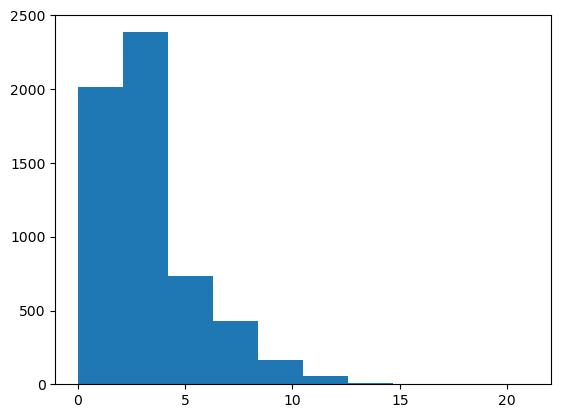

5788 affected samples out of (95, 5800) total samples


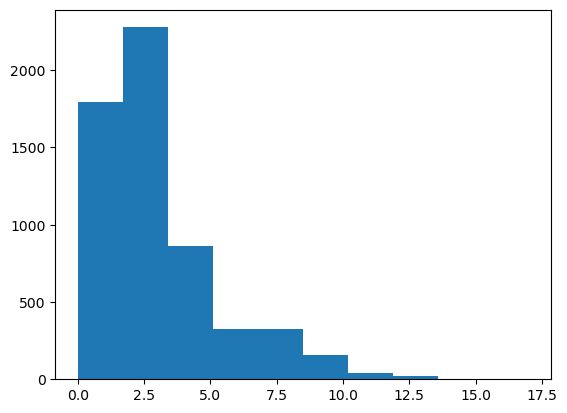

5693 affected samples out of (95, 5802) total samples


In [13]:

affected_reactions_count, total_affected_samples = calculate_affected_samples(samples_dingo_ec_model, 
                                                                              samples_dingo_ec_model_loopless_solutions, 
                                                                              ec_cobra_model, 
                                                                              tol_reaction_difference=0.5, 
                                                                              tol_reactions_count=1)

plt.hist(affected_reactions_count)
plt.show()
    
print(total_affected_samples, "affected samples out of", (samples_dingo_ec_model).shape, "total samples")



affected_reactions_count, total_affected_samples = calculate_affected_samples(samples_optgp_ec_model, 
                                                                              samples_optgp_ec_model_loopless_solutions, 
                                                                              ec_cobra_model, 
                                                                              tol_reaction_difference=0.5, 
                                                                              tol_reactions_count=1)

plt.hist(affected_reactions_count)
plt.show()
    
print(total_affected_samples, "affected samples out of", (samples_optgp_ec_model).shape, "total samples")


In addition, calculating distances between samples before and after loopless solution (for 3000 samples ==> 3000 distances) and calculation of the average and standard deviation of these (3000) distances.

In [8]:

distances_array = calculate_distances_from_reactions(samples_dingo_ec_model, samples_dingo_ec_model_loopless_solutions, ec_cobra_model)
violin_plot_samples_distances(distances_array)


distances_array = calculate_distances_from_samples(samples_dingo_ec_model, samples_dingo_ec_model_loopless_solutions, ec_cobra_model)
violin_plot_samples_distances(distances_array)


distances_array = calculate_distances_from_reactions(samples_dingo_ec_model_constrained, samples_dingo_ec_model_constrained_loopless_solutions, ec_cobra_model)
violin_plot_samples_distances(distances_array)


distances_array = calculate_distances_from_samples(samples_dingo_ec_model_constrained, samples_dingo_ec_model_constrained_loopless_solutions, ec_cobra_model)
violin_plot_samples_distances(distances_array)
